In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [21]:
from scipy.fftpack import fft2, fftshift

# Step 1: Read an image and convert it to grayscale
image = cv2.imread('C://Users//owner//Pictures//Saved Pictures//pexels-pixabay-60597.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


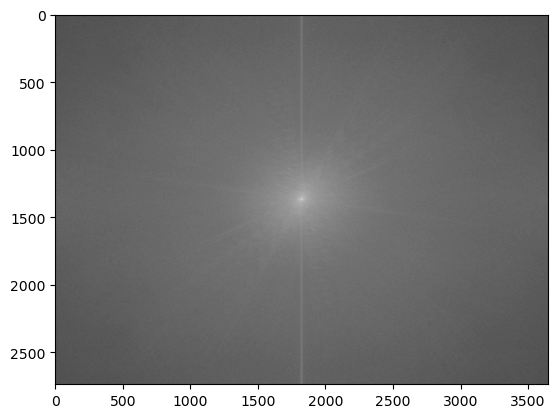

In [22]:
dft=np.fft.fft2(gray_image,axes=(0,1))
dft.shape

dft=np.fft.fft2(gray_image,axes=(0,1))
dft_shift=np.fft.fftshift(dft)
mag=np.abs(dft_shift)
spec=np.log(mag) /20
plt.imshow(spec,cmap='gray')

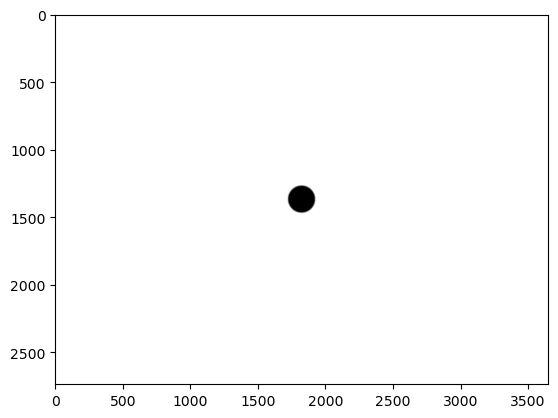

In [41]:
rad=100
mask=np.zeros_like(gray_image)
cy=mask.shape[0]//2
cx=mask.shape[1]//2
cv2.circle(mask,(cx,cy),rad,(255,255,255),-1)[0]
mask2= 255 - cv2.GaussianBlur(mask,(19,19),0)
plt.imshow(mask2, cmap='gray')

C:\Users\owner\AppData\Local\Temp\ipykernel_3524\1587031203.py:5: RuntimeWarning: divide by zero encountered in log
  spec=np.log(mag) /20


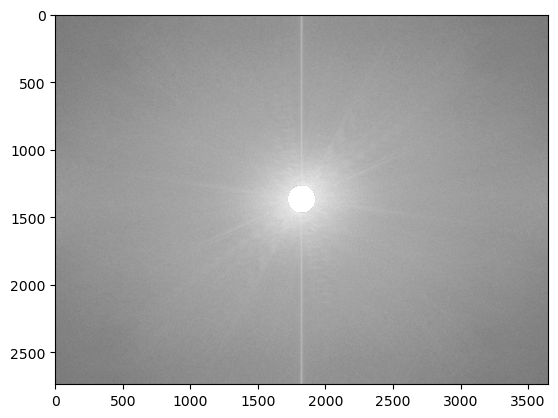

In [42]:
dft_shift_masked = np.multiply(dft_shift,mask) / 255
dft_shift_masked2 = np.multiply(dft_shift,mask2) / 255

mag=np.abs(dft_shift_masked2)
spec=np.log(mag) /20
plt.imshow(spec,cmap='gray')

In [43]:
backed_ishift=np.fft.ifftshift(dft_shift)
backed_ishift_masked=np.fft.ifftshift(dft_shift_masked)
backed_ishift_masked2=np.fft.ifftshift(dft_shift_masked2)

img_back = np.fft.ifft2(backed_ishift,axes=(0,1))
img_filtered = np.fft.ifft2(backed_ishift_masked,axes=(0,1))
img_filtered2 = np.fft.ifft2(backed_ishift_masked2,axes=(0,1))

img_back = np.abs(img_back).clip(0,255).astype(np.uint8)
img_filtered =np.abs(img_filtered).clip(0,255).astype(np.uint8)
img_filtered2 =np.abs(img_filtered2).clip(0,255).astype(np.uint8)

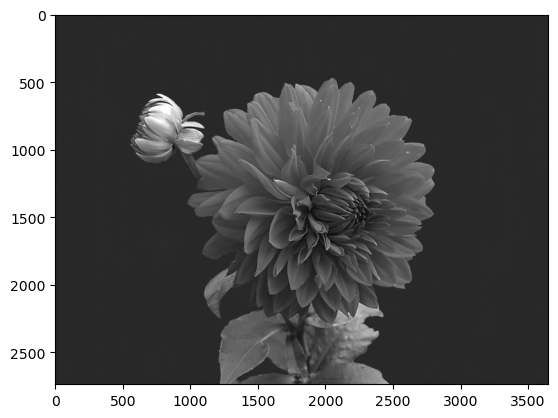

In [44]:
plt.imshow(img_back, cmap='gray')
#plt.imshow(img_filtered, cmap='gray')
#plt.imshow(img_filtered2, cmap='gray')

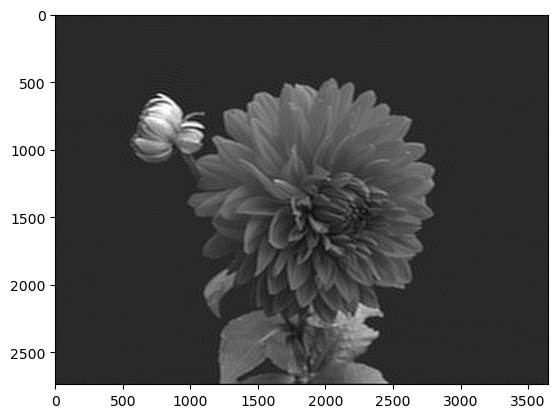

In [45]:
plt.imshow(img_filtered, cmap='gray')


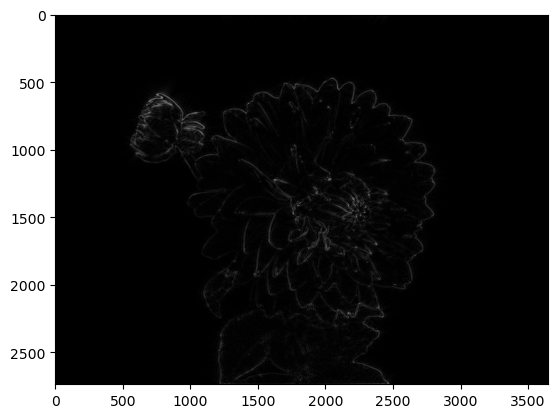

In [46]:
plt.imshow(img_filtered2, cmap='gray')